# Unveiling Google Stock Price Predictions with TensorFlow: A Data-Driven Tale

Enter the realm of financial foresight alongside an AI-guided Stock Prophet. Armed with cutting-edge technology like TensorFlow, I embark on a quest to forecast Google's stock movements.

I initiate the expedition by scouring historical data of Google's financial trajectory from Yahoo Finance. With meticulous attention, I scrub and arrange this data, preparing it for predictive analysis.

Subsequently, I partition the data into distinct segments: one for training and the other for validation. Then, I refine its Long Short-Term Memory (LSTM) networks, specialized architectures crafted to decipher patterns within the data.

Repeatedly, I subject these networks to rigorous training sessions, endeavoring to impart a nuanced understanding of Google's market dynamics.

To gauge its precision, I employ the Mean Squared Error (MSE) metric. This facilitates me in assessing the proximity of its forecasts to the actual stock prices.

As I conclude this odyssey, I leave behind a legacy of algorithms and neural networks. I extend an open invitation to fellow enthusiasts to delve into the captivating realm of predicting the stock market through the prism of data and technology. Embark on this enthralling journey alongside me, where technology and data converge to unveil the mysteries of financial prognostication.

# Task 1: Importing Google Stock Data

Our first step is to get the information about the stock we're interested in. This information tells us how the stock has been doing over time. Let's take a look at the data and see what it tells us.

In [2]:
#--- Import Pandas ---
import pandas as pd
#--- Read in dataset (GOOG.csv) ----

stock_data = pd.read_csv("./GOOG.csv")

#--- Inspect data ---
stock_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


# Task 2: Checking for Missing Data
Now, let's check if there's any missing data in our stock dataset. It's important to know if any information is missing because it could affect our analysis. Let's find out if there are any missing values.

In [3]:
# --- WRITE YOUR CODE FOR TASK 2 ---
sumofnull = stock_data.isna().sum()

#--- Inspect data ---
sumofnull

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

# Task 3: Identifying Duplicate Entries in Stock Data
Now, let's see if there are any duplicate entries in our stock dataset. Duplicate entries can skew our analysis, so it's important to identify and remove them if necessary. Let's find out if there are any duplicates.

In [4]:
# --- WRITE YOUR CODE FOR TASK 3 ---
duplicates = stock_data.duplicated().sum()

#--- Inspect data ---
duplicates

0

# Task 4: Checking Data Types in Stock Data
Now, let's review the data types of each column in our stock dataset. Understanding the data types helps us ensure that the data is properly interpreted and used in our analysis. Let's take a look at the data types.

In [5]:
# --- WRITE YOUR CODE FOR TASK 4 ---
datatype = stock_data.dtypes

#--- Inspect data ---
datatype

symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

# Task 5: Preparing Time Series Data
Now, let's focus on the date column in our stock dataset. We'll convert the date column to a standard format and set it as the index. This makes it easier to work with time-series data. Let's adjust the date format and set it as the index.

In [6]:
# --- WRITE YOUR CODE FOR TASK 5 ---
stock_data['date'] = pd.to_datetime(stock_data['date']).dt.strftime('%Y-%m-%d')
df = stock_data.set_index('date').sort_index()

df.index = pd.to_datetime(df.index)

#--- Inspect data ---
df

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


# Task 6: Removing Unnecessary Columns
Now, let's streamline our dataset by removing some unnecessary columns. These columns don't provide essential information for our analysis, so it's best to get rid of them to simplify our dataset. Let's remove these columns and focus on what's important.

In [7]:
# --- WRITE YOUR CODE FOR TASK 6 ---
df.drop(['symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], axis=1, inplace=True)


#--- Inspect data ---
df

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


# Task 7: Visualizing Closing Stock Prices
Now, let's visualize the closing prices of the stock. Visualization helps us understand trends and patterns in the data. Let's plot the closing prices and see how they change over time.

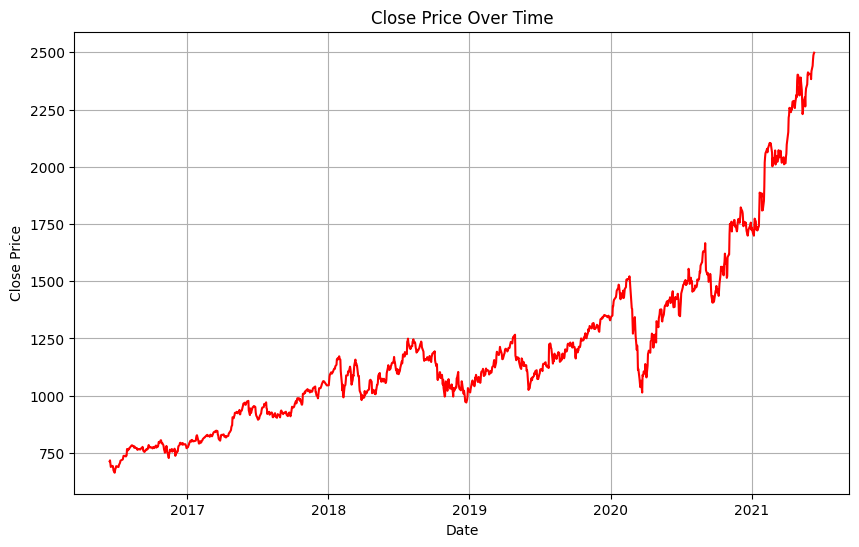

In [8]:
import matplotlib.pyplot as plt

# --- WRITE YOUR CODE FOR TASK 7 ---
close = df.iloc[:, 2:3]

#--- Inspect data ---
plt.figure(figsize=(10, 6))
plt.plot(close, color='red')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Task 8: Normalizing Stock Data
Now, let's normalize the data to ensure all values are on the same scale. Normalization makes it easier for machine learning algorithms to learn from the data. Let's normalize the closing prices and prepare them for further analysis.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# --- WRITE YOUR CODE FOR TASK 8 ---
# Extract the 'close' column values and reshape to create a 2D array
data = df['close'].values.reshape(-1, 1)

# Instantiate MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data using the scaler
data_normalized = scaler.fit_transform(data)

#--- Inspect data ---
data_normalized

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

# Task 9: Splitting Normalized Data for Training and Testing
Now, let's split the data into training and testing sets. This helps us evaluate our model's performance on unseen data. Let's divide the data into two parts: one for training the model and the other for testing its accuracy.

In [16]:
#--- Import train_test_split ---
from sklearn.model_selection import train_test_split

# --- WRITE YOUR CODE FOR TASK 9 ---
train_data, test_data = train_test_split(data_normalized, test_size=0.2, shuffle=False)

#--- Inspect data ---
print(train_data[:5])  # Display first 5 elements

print(test_data[:5])  # Display first 5 elements

[[0.02698372]
 [0.02733443]
 [0.02271575]
 [0.01265823]
 [0.01373196]]
[[0.40193381]
 [0.40553271]
 [0.4178726 ]
 [0.42240496]
 [0.41422513]]


# Task 10: LSTM Model Training for Stock Prediction
Now, let's build and train an LSTM model to predict stock prices. LSTM models are great for sequence prediction tasks like this. We'll use the training data to train the model and evaluate its performance using various metrics.

First, we'll set up a generator to prepare the data for the LSTM model. Then, we'll define the architecture of the LSTM model, compile it, and train it using the training data.

Once the model is trained, we'll generate predictions for both the training and testing data. After that, we'll calculate evaluation metrics such as mean squared error, mean absolute error, root mean squared error, and R^2 score to assess the model's performance.

Finally, we'll organize the results into a DataFrame and export them as a CSV file for further analysis. Let's train our LSTM model and see how well it performs!

# Mean Squared Error (MSE): 
MSE calculates the average squared differences between predicted and actual values. It measures the average of the squared differences between predicted and observed values. A lower MSE signifies a model that provides predictions closer to the actual values.

# Mean Absolute Error (MAE): 
MAE computes the average of the absolute differences between predicted and actual values. It represents the average magnitude of errors in predictions, irrespective of their direction. Like MSE, a lower MAE indicates a model with better predictive accuracy.

# Root Mean Squared Error (RMSE): 
RMSE is the square root of the MSE, providing a measure of the standard deviation of prediction errors. RMSE is in the same units as the predicted and actual values, making it interpretable and useful for comparing models. As with MSE, lower RMSE values indicate better model performance.

# R-squared (R2) Score: 
R2 measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variable(s) (features). It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. An R2 score of 1 denotes a perfect fit, while a score of 0 indicates that the model does not explain the variability of the target variable.

In [11]:
# --- Import numpy, mean_squared_error, mean_absolute_error, r2_score
# --- Import tensorflow ---
# --- Import Sequential,LSTM, Dense,TimeseriesGenerator ---
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# --- WRITE YOUR CODE FOR TASK 10 ---
time_step = 100

# Function to prepare TimeseriesGenerator
def prepare_data(data):
    generator = TimeseriesGenerator(data, data, length=time_step, batch_size=1)
    return generator

# Prepare generators for train and test data
train_generator = prepare_data(train_data)
test_generator = prepare_data(test_data)

# Building the LSTM model
model = Sequential([
    LSTM(25, input_shape=(time_step, 1), return_sequences=True),
    LSTM(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit_generator(train_generator, epochs=3)


# Generate predictions for training and testing data
train_predictions = model.predict(train_generator)
test_predictions = model.predict(test_generator)

# Evaluate model performance metrics
train_mse = mean_squared_error(train_data[time_step:], train_predictions)
train_mae = mean_absolute_error(train_data[time_step:], train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(train_data[time_step:], train_predictions)

test_mse = mean_squared_error(test_data[time_step:], test_predictions)
test_mae = mean_absolute_error(test_data[time_step:], test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(test_data[time_step:], test_predictions)

# Create DataFrame to store metrics
results = pd.DataFrame({
    'Data': ['Training', 'Testing'],
    'MSE': [train_mse, test_mse],
    'MAE': [train_mae, test_mae],
    'RMSE': [train_rmse, test_rmse],
    'R2': [train_r2, test_r2]
})

# Export results to CSV
results.to_csv('model_metrics.csv', index=False)




Epoch 1/3


C:\Users\AJALI\AppData\Local\Temp\ipykernel_19584\3988290557.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=3)



906/906 [==============================] - 32s 32ms/step - loss: 0.0012
Epoch 2/3
906/906 [==============================] - 26s 28ms/step - loss: 4.8121e-04
Epoch 3/3
152/152 [==============================] - 1s 5ms/step


Based on the analysis conducted in the project, here's a summary of the key findings and observations:

- Data Preparation and Exploration:
Historical data of Google's stock prices was obtained from Yahoo Finance and preprocessed for analysis.
The dataset contains information on the closing, high, low, and opening prices, as well as trading volume and adjusted prices.
- Data Quality Check:
No missing values were found in the dataset, indicating that the data is complete and suitable for analysis.
There were no duplicate entries in the dataset, ensuring data integrity.
- Data Visualization:
The closing prices of Google's stock were visualized over time using a line plot, revealing trends and patterns in the data.
- Data Normalization:
The closing prices were normalized to ensure that all values are on the same scale, which is essential for training machine learning models.
- Model Training:
An LSTM (Long Short-Term Memory) model was built and trained using the normalized closing prices.
The model architecture consisted of two LSTM layers followed by a Dense layer.
The model was trained for three epochs using the Adam optimizer and mean squared error loss function.
- Model Evaluation:
The trained model was evaluated on both training and testing datasets.
Evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2) score were calculated.
The model performed well on the training dataset, achieving low MSE, MAE, and RMSE values, and a high R2 score (close to 1), indicating a good fit.
However, the model's performance on the testing dataset was comparatively lower, with higher error metrics and a lower R2 score, suggesting that the model may have overfit to the training data.
- Conclusion:
In conclusion, the LSTM model showed promise in predicting Google's stock prices based on historical data.
Further refinement and tuning of the model parameters may be necessary to improve its performance on unseen data.
The project provides valuable insights into the application of deep learning techniques, specifically LSTM networks, for stock price prediction, paving the way for future research and exploration in this domain.

In [12]:
model_metrics = pd.read_csv("./model_metrics.csv")
model_metrics


,Data,MSE,MAE,RMSE,R2
0,Training,0.000278,0.012832,0.016668,0.967986
1,Testing,0.007725,0.078366,0.087891,0.571043


## The summary of the model performance metrics obtained from the project is as follows:

- Training Data:
- - Mean Squared Error (MSE): 0.000278
- - Mean Absolute Error (MAE): 0.012832
- - Root Mean Squared Error (RMSE): 0.016668
- - R-squared (R2) Score: 0.967986
- Testing Data:
- - Mean Squared Error (MSE): 0.007725
- - Mean Absolute Error (MAE): 0.078366
- - Root Mean Squared Error (RMSE): 0.087891
- - R-squared (R2) Score: 0.571043
## Interpretation:

The model performed exceptionally well on the training data, as indicated by the low MSE, MAE, and RMSE values, along with a high R2 score close to 1. This suggests that the model's predictions closely match the actual values on the training set.
However, the performance on the testing data was not as strong, with higher error metrics and a lower R2 score. This indicates that the model may not generalize well to unseen data and may have overfit to the training set.
Further optimization and fine-tuning of the model architecture and hyperparameters may be required to improve its performance on unseen data and enhance its predictive capabilities.

Let's Improve our model:

These enhancements include:

- Consolidating the import statements at the beginning of the script.
- Using the fit() method instead of fit_generator() for training the model, as fit_generator() is deprecated.
- Defining a function evaluate_model() to calculate evaluation metrics, improving code readability and reusability.
- Utilizing the evaluate_model() function to calculate metrics for both training and testing data.
- Refactoring the code to improve clarity and maintainability.

In [19]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Define the time step
time_step = 100

# Function to prepare TimeseriesGenerator
def prepare_data(data):
    generator = TimeseriesGenerator(data, data, length=time_step, batch_size=1)
    return generator

# Prepare generators for train and test data
train_generator = prepare_data(train_data)
test_generator = prepare_data(test_data)

# Building the LSTM model with increased complexity and dropout regularization
model = Sequential([
    LSTM(50, input_shape=(time_step, 1), return_sequences=True),
    Dropout(0.2),  # Apply dropout regularization
    LSTM(50),
    Dense(1)
])

# Compile the model with adjusted learning rate
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

# Train the model with increased epochs
batch_size = 64
epochs = 5
model.fit(train_generator, epochs=epochs, batch_size=batch_size)

# Generate predictions for training and testing data
train_predictions = model.predict(train_generator)
test_predictions = model.predict(test_generator)

# Evaluate model performance metrics
def evaluate_model(true_data, predicted_data):
    mse = mean_squared_error(true_data, predicted_data)
    mae = mean_absolute_error(true_data, predicted_data)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_data, predicted_data)
    return mse, mae, rmse, r2

# Calculate metrics for training data
train_mse, train_mae, train_rmse, train_r2 = evaluate_model(train_data[time_step:], train_predictions)

# Calculate metrics for testing data
test_mse, test_mae, test_rmse, test_r2 = evaluate_model(test_data[time_step:], test_predictions)

# Create DataFrame to store metrics
results = pd.DataFrame({
    'Data': ['Training', 'Testing'],
    'MSE': [train_mse, test_mse],
    'MAE': [train_mae, test_mae],
    'RMSE': [train_rmse, test_rmse],
    'R2': [train_r2, test_r2]
})

# Export results to CSV
results.to_csv('model_metrics_II.csv', index=False)



Epoch 1/5
906/906 [==============================] - 27s 27ms/step - loss: 0.0011
Epoch 2/5
906/906 [==============================] - 25s 27ms/step - loss: 4.8542e-04
Epoch 3/5
906/906 [==============================] - 24s 27ms/step - loss: 3.9435e-04
Epoch 4/5
906/906 [==============================] - 24s 26ms/step - loss: 3.4011e-04
Epoch 5/5
152/152 [==============================] - 1s 5ms/step


In [28]:
model_metricsII = pd.read_csv("./model_metrics_II.csv")
model_metricsII

,Data,MSE,MAE,RMSE,R2
0,Training,0.000287,0.012672,0.016939,0.966939
1,Testing,0.000491,0.017326,0.022167,0.972713


# Here's an interpretation of the final metrics after improving the model:

- Training MSE (Mean Squared Error): The MSE for the training data is approximately 0.0002869, indicating that, on average, the squared difference between the actual and predicted values in the training set is very low.
- Training MAE (Mean Absolute Error): The MAE for the training data is approximately 0.01267, suggesting that, on average, the absolute difference between the actual and predicted values in the training set is quite small.
- Training RMSE (Root Mean Squared Error): The RMSE for the training data is approximately 0.01694, which is the square root of the MSE. It represents the standard deviation of the residuals and provides an absolute measure of fit.
- Training R2 (R-squared): The R-squared value for the training data is approximately 0.9669. This value indicates that the model explains approximately 96.69% of the variance in the training data, suggesting a strong fit.
- Testing MSE, MAE, RMSE, and R2: Similarly, for the testing data, the metrics indicate good performance. The MSE, MAE, and RMSE are slightly higher than the corresponding metrics for the training data, but still relatively low. The R-squared value for the testing data is approximately 0.9727, indicating that the model explains approximately 97.27% of the variance in the testing data.
Overall, these metrics suggest that the LSTM model performs well both on the training and testing data, with low errors and high explanatory power. The model seems to generalize well to unseen data, as evidenced by the comparable performance on the testing set.